In [74]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sm

In [75]:
df_teamstats = pd.read_csv("data/AmericanFootball98.csv")
df_sb = pd.read_csv("data/superbowl.csv")

In [76]:
sb_dict = {
    "New England Patriots":1,
    "Miami Dolphins":2,
    "Buffalo Bills":3,
    "New York Jets":4,
    "Cincinnati Bengals":5,
    "Pittsburgh Steelers":6,
    "Baltimore Ravens":7,
    "Cleveland Browns": 8, #team has not been to the SB yet
    "Baltimore Colts":9,
    "Indianapolis Colts":10, #2nd Colts Team
    "Jacksonville Jaguars":11, #team has not been to the SB yet
    "Tennessee Titans":12, 
    "Houston Texans":13, #team has not been to the SB yet
    "Denver Broncos":14,
    "Kansas City Chiefs":15,
    "San Diego Chargers":16, #omitted LA Chargers, no SB appearance
    "Oakland Raiders":17, #omitted LV Raiders, no SB appearance
    "Los Angeles Raiders":18, #2nd Raiders Team
    "New York Giants":19,
    "Washington Redskins":20, #omitted Commanders, no SB appearance
    "Dallas Cowboys":21,
    "Philadelphia Eagles":22,
    "Chicago Bears":23,
    "Minnesota Vikings":24,
    "Detroit Lions":"Lions", #team has not been to SB yet
    "Green Bay Packers":25,
    "Tampa Bay Buccaneers":26,
    "Carolina Panthers":27,
    "Atlanta Falcons":28,
    "New Orleans Saints":29,
    "Seattle Seahawks":30,
    "St. Louis Rams":31,
    "Los Angeles Rams":32, #2nd Rams Team
    "Arizona Cardinals":33,
    "San Francisco 49ers":34
}

mascottocode = {
    "Patriots": 1,
    "Dolphins": 2,
    "Bills":3,
    "Jets":4,
    "Bengals":5,
    "Steelers":6,
    "Ravens":7,
    "Browns":8,
    "Colts":9,
    "Jaguars":10,
    "Titans":11,
    "Texans":12,
    "Broncos":13,
    "Chiefs":14,
    "Chargers":15,
    "Raiders":16,
    "Giants":17,
    "Redskins":18,
    "Cowboys":19,
    "Eagles":20,
    "Bears":21,
    "Vikings":22,
    "Lions":23,
    "Packers":24,
    "Buccaneers":25,
    "Panthers":26,
    "Falcons":27,
    "Saints":28,
    "Seahawks":29,
    "Rams":30,
    "Cardinals":31,
    "49ers":32
}

In [77]:
data = pd.read_csv('data/nfl_team_stats_2002-2023.csv')

data['winner'] = data.apply(lambda row: row['away'] if row['score_away'] > row['score_home'] else (row['home'] if row['score_away'] < row['score_home'] else 'Tie'), axis=1)

data['winner'] = data['winner'].map(mascottocode)

data = data.dropna()

df_season_winner = df_sb[['Date', 'Winner']]

df_season_winner['Season Year'] = pd.to_datetime(df_season_winner['Date']).dt.year

df_season_winner = df_season_winner.drop(['Date'], axis=1)

df_season_winner.rename(columns={'Season Year': 'Season'}, inplace=True)

df_season_winner = df_season_winner[df_season_winner['Season'] > 2001]

new_winners = pd.DataFrame({
    'Winner': ['Kansas City Chiefs', 'Los Angeles Rams', 'Tampa Bay Buccaneers'], 
    'Season': [2023, 2022, 2021]
})

df_updated = pd.concat([new_winners, df_season_winner], ignore_index=True)

df_updated.rename(columns={'Season': 'season'}, inplace=True)
df_updated.rename(columns={'Winner': 'sb_winner'}, inplace=True)

data= pd.merge(data, df_updated, on='season', how='left')

data['sb_winner'] = data['sb_winner'].map(sb_dict)

data

/tmp/ipykernel_2254/4015215773.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season_winner['Season Year'] = pd.to_datetime(df_season_winner['Date']).dt.year


,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home,winner,sb_winner
0,2002,1,2002-09-05,49ers,Giants,16,13,13,21,4,...,0,0,1,3,0,0,27:32,32:28,32.0,1
1,2002,1,2002-09-08,Jets,Bills,37,31,18,26,2,...,1,1,0,2,2,0,21:06,39:08,4.0,1
2,2002,1,2002-09-08,Vikings,Bears,23,27,19,20,5,...,1,1,2,1,0,0,31:31,28:29,21.0,1
3,2002,1,2002-09-08,Chargers,Bengals,34,6,27,13,6,...,0,0,0,1,0,0,37:48,22:12,15.0,1
4,2002,1,2002-09-08,Chiefs,Browns,40,39,24,24,5,...,0,1,1,0,0,0,30:16,29:44,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,2023,Division,2024-01-21,Buccaneers,Lions,23,31,23,26,4,...,0,0,2,0,0,0,28:00,32:00,23.0,15
5768,2023,Division,2024-01-21,Chiefs,Bills,27,24,21,27,1,...,1,0,0,0,0,0,22:57,37:03,14.0,15
5769,2023,Conference,2024-01-28,Chiefs,Ravens,17,10,22,16,8,...,0,2,0,1,0,0,37:30,22:30,14.0,15
5770,2023,Conference,2024-01-28,Lions,49ers,31,34,28,23,6,...,1,0,0,1,0,0,27:48,32:12,32.0,15


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff67d768550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff67d768550>
Traceback 

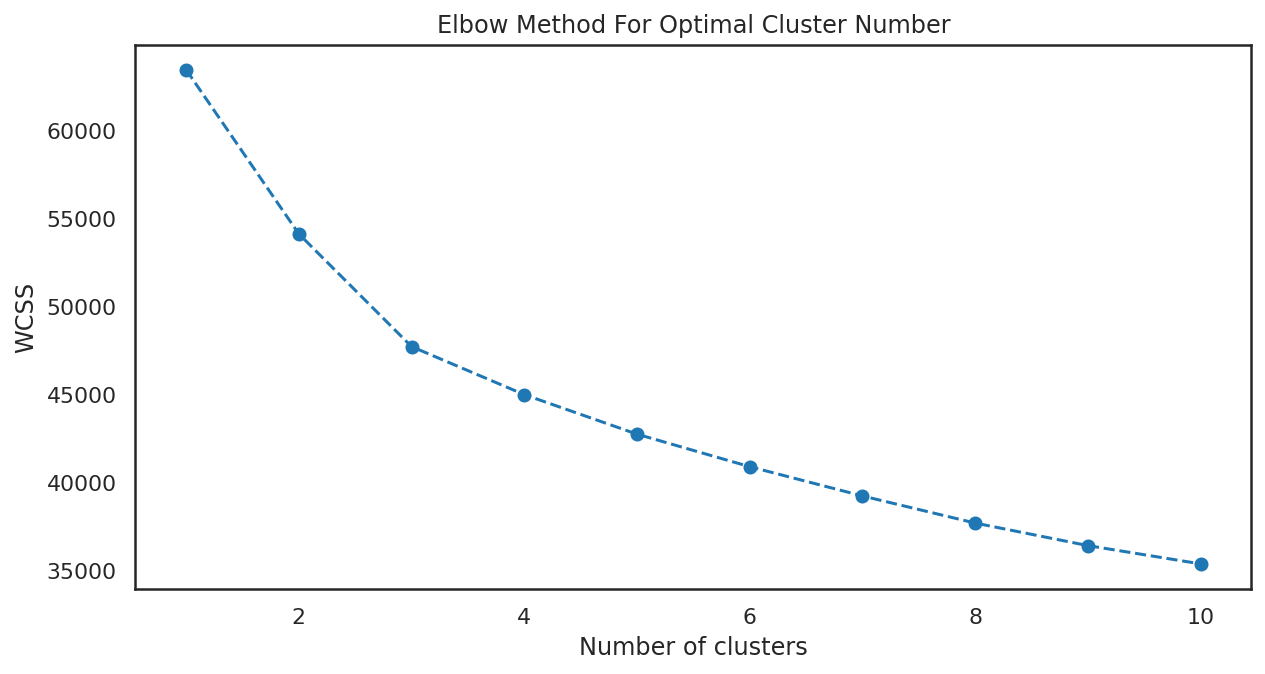

For n_clusters = 2, silhouette score is 0.135781680425689)
For n_clusters = 3, silhouette score is 0.13231221224335318)
For n_clusters = 4, silhouette score is 0.112793591119862)
For n_clusters = 5, silhouette score is 0.11116927172764828)
For n_clusters = 6, silhouette score is 0.10909766675356992)
For n_clusters = 7, silhouette score is 0.11058494071696916)
For n_clusters = 8, silhouette score is 0.11360159343566541)
For n_clusters = 9, silhouette score is 0.09901844225418237)
For n_clusters = 10, silhouette score is 0.09735796500464285)


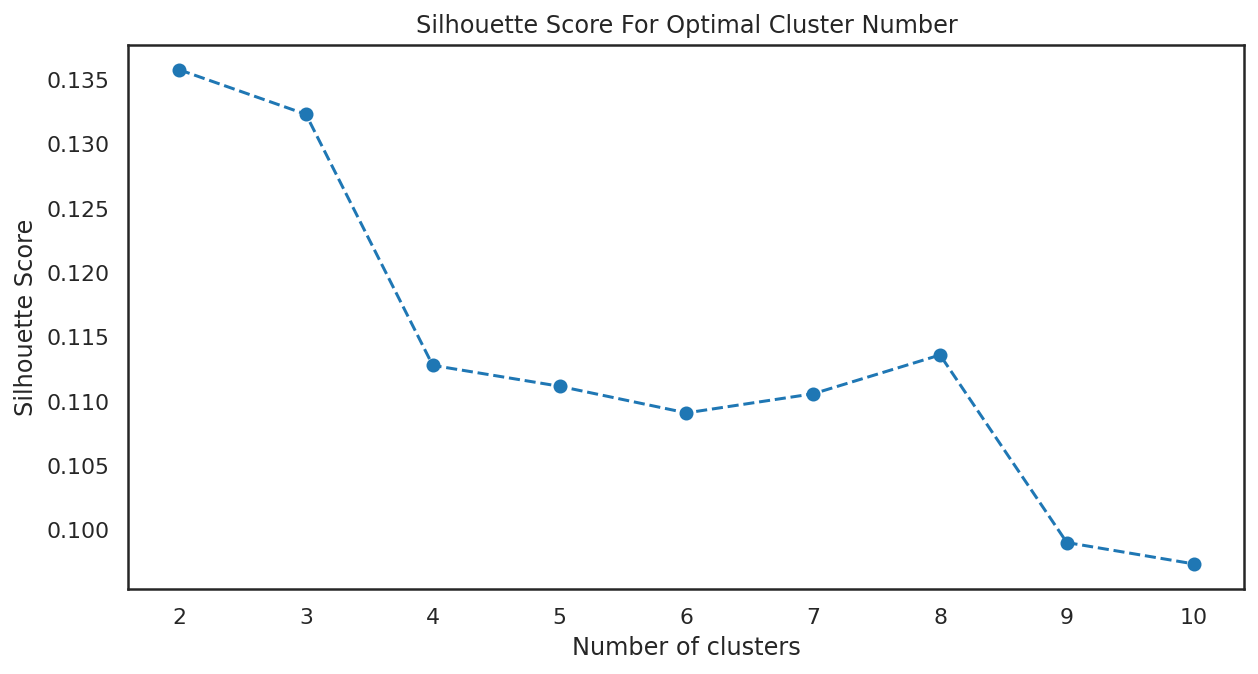

In [78]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Prepare features for K-Means clustering
features = ['score_away', 'score_home', 'first_downs_away', 'first_downs_home', 'yards_home', 'yards_away', 'fumbles_away', 'fumbles_home', 'interceptions_away', 'interceptions_home',"winner"]  # Updated to include more features
X = data[features]  # Make sure to use your actual dataframe name

# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):  # for example, testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


silhouette_scores = [] 
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_scaled)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)
    print("For n_clusters = {}, silhouette score is {})".format(n_cluster, silhouette))
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Prepare features for K-Means clustering
features = ['score_away', 'score_home', 'first_downs_away', 'first_downs_home', 'yards_home', 'yards_away', 'fumbles_away', 'fumbles_home', 'interceptions_away', 'interceptions_home', 'winner', 'sb_winner']  # Updated to include more features
X = data[features]  # Make sure to use your actual dataframe name

# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

X_with_clusters = np.column_stack((X_scaled, clusters))

# Assuming 'sb_winner' is the binary target variable indicating Super Bowl win
#y = data['sb_winner'].values

# Now, use the clusters as a feature for SVM classification
data['Cluster'] = clusters  # Make sure to use your actual dataframe name
y = data['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

unique_values = np.unique(data['sb_winner'])
print("Unique values in 'sb_winner':", unique_values)


# Split the data again with the encoded y
#X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2, random_state=42)

#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train)
#log_reg_pred = log_reg.predict(X_test)
#log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
#print("Logistic Regression Accuracy:", log_reg_accuracy)

# Train SVM model for classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the classification for a new scaled data point
new_data_point = scaler.transform([[10, 9 , 8, 7, 6, 5, 4, 3, 2, 1, 2, 2]])  # Example: 5 wins, 3 losses, 0 ties
predicted_cluster = svm_model.predict(new_data_point)
print("Predicted Cluster for New Data Point:", predicted_cluster)

# Predict if this hypothetical team would win the Super Bowl according to the SVM model
teams_in_cluster = data[data['Cluster'] == predicted_cluster[0]]['winner'].unique().tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

Unique values in 'sb_winner': [1 6 7 10 14 15 19 22 25 26 29 30 32]
Accuracy: 0.9904761904761905
Predicted Cluster for New Data Point: [2]
Teams in Predicted Cluster: [26.0, 9.0, 13.0, 12.0, 1.0, 21.0, 8.0, 19.0, 28.0, 25.0, 23.0, 24.0, 10.0, 31.0, 15.0, 7.0, 17.0, 2.0, 30.0, 4.0, 20.0, 6.0, 29.0, 27.0, 11.0, 14.0, 3.0, 32.0, 16.0, 5.0, 22.0]


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Get feature importances directly from the model
importances = rf.feature_importances_

# Get the feature names directly from the X_train if it's a DataFrame
# If X_train is a numpy array, we need to create feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    # Assuming X_train is a numpy array and we have a 'clusters' column at the end
    feature_names = features + ['Cluster']

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the DataFrame to see which features have the most importance
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances_sorted)

ValueError: All arrays must be of the same length

In [73]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Apply Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_model.fit_predict(X_scaled)

# Add the hierarchical cluster labels to your dataset
data['Hierarchical_Cluster'] = hierarchical_clusters


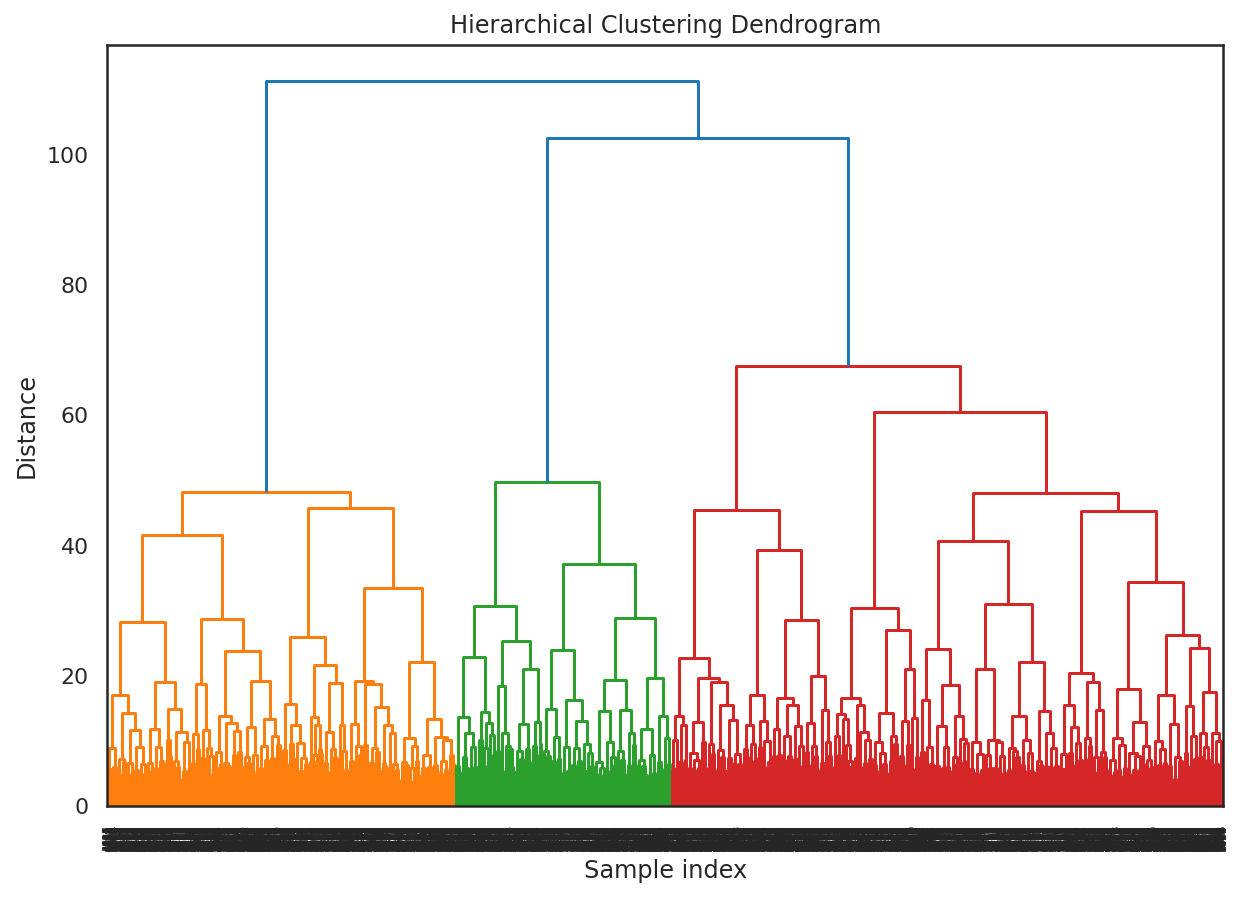

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [61]:
from sklearn.decomposition import PCA

# Assuming X_scaled is your scaled feature set from the StandardScaler

# Initialize PCA, you can decide how many components you want to keep
# For example, to keep 95% of variance explained you can set n_components to 0.95
pca = PCA(n_components=0.95)

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Transform the scaled data according to the fitted PCA
X_pca = pca.transform(X_scaled)

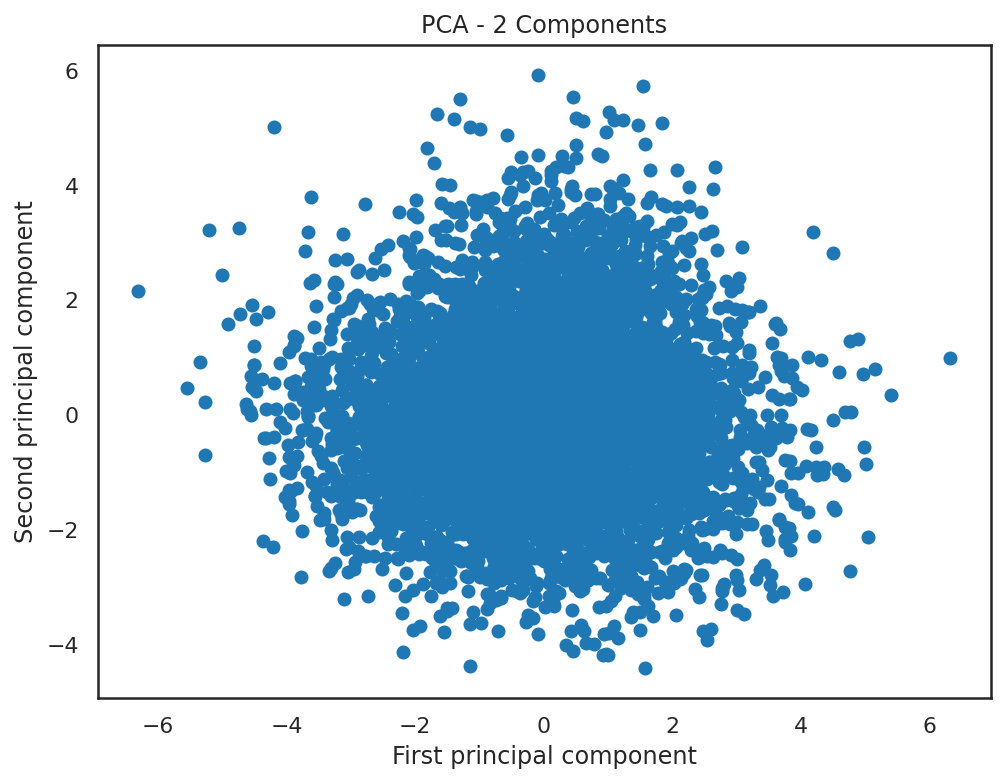

In [62]:
import matplotlib.pyplot as plt

# Assuming PCA has been reduced to 2 components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA - 2 Components')
plt.show()

In [63]:
# make a linear regreesion model to predict the home team score
data['score_diff'] = data['score_home'] - data['score_away']
model = sm.OLS(data['winner'], data.select_dtypes(['number']).drop(columns=['winner','score_diff','score_home','score_away']))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 winner   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              386.4
Date:                Wed, 20 Mar 2024   Prob (F-statistic):                        0.00
Time:                        22:05:06   Log-Likelihood:                         -21108.
No. Observations:                5772   AIC:                                  4.231e+04
Df Residuals:                    5727   BIC:                                  4.261e+04
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
season                    0.0106      0.001      8.985      0.000       0.008       0.013
first_downs_away         -0.0621      0.089     -0.696      0.486      -0.237       0.113
first_downs_home         -0.1474      0.086     -1.715      0.086      -0.316       0.021
third_down_comp_away     -0.0938      0.130     -0.719      0.472      -0.350       0.162
third_down_att_away       0.0756      0.161      0.470      0.638      -0.240       0.391
third_down_comp_home      0.0667      0.128      0.521      0.603      -0.184       0.318
third_down_att_home      -0.2007      0.157     -1.277      0.202      -0.509       0.107
fourth_down_comp_away    -0.1493      0.255     -0.586      0.558      -0.649       0.350
fourth_down_att_away     -0.1075      0.181     -0.594      0.552      -0.462       0.247
fourth_down_comp_home     0.2468      0.267      0.926      0.355      -0.276       0.769
fourth_down_att_home     -0.1665      0.194     -0.859      0.390      -0.547       0.214
plays_away               -0.0373      0.194     -0.192      0.848      -0.418       0.344
plays_home                0.3144      0.299      1.051      0.293      -0.272       0.901
drives_away               0.0826      0.101      0.817      0.414      -0.116       0.281
drives_home              -0.0705      0.104     -0.675      0.500      -0.275       0.134
yards_away                0.0046      0.002      2.168      0.030       0.000       0.009
yards_home                0.0047      0.002      2.261      0.024       0.001       0.009
pass_comp_away           -0.0125      0.056     -0.224      0.823      -0.121       0.096
pass_att_away             0.0103      0.203      0.051      0.960      -0.388       0.409
pass_yards_away           0.0004      0.002      0.193      0.847      -0.004       0.005
pass_comp_home            0.0784      0.056      1.408      0.159      -0.031       0.188
pass_att_home            -0.3540      0.306     -1.157      0.247      -0.954       0.246
pass_yards_home           0.0008      0.002      0.391      0.696      -0.003       0.005
sacks_num_away           -0.1207      0.256     -0.472      0.637      -0.622       0.380
sacks_yards_away          0.0254      0.022      1.136      0.256      -0.018       0.069
sacks_num_home           -0.2432      0.346     -0.704      0.482      -0.921       0.434
sacks_yards_home          0.0127      0.023      0.558      0.577      -0.032       0.058
rush_att_away            -0.0729      0.203     -0.360      0.719      -0.470       0.324
rush_yards_away           0.0042      0.003      1.444      0.149      -0.001       0.010
rush_att_home            -0.3921      0.305     -1.286      0.198      -0.990       0.206
rush_yards_hom